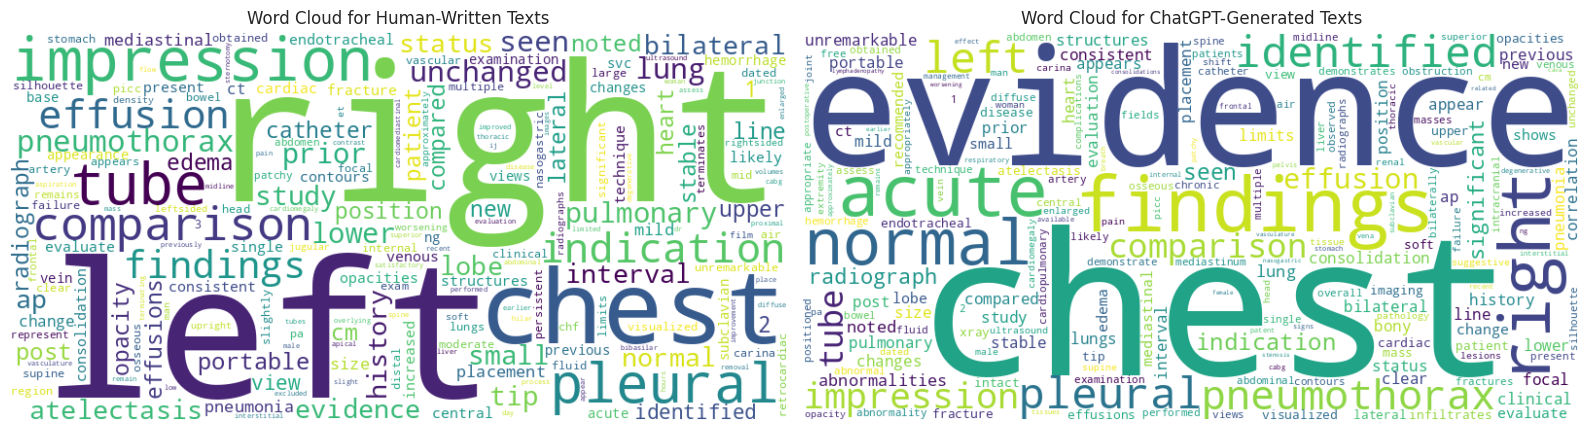

In [12]:
import spacy
from collections import Counter
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

nlp = spacy.load("en_core_web_sm")

def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    doc = nlp(text)
    tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
    return tokens

def generate_wordcloud(data_path, human_label=0, chatgpt_label=1):
    data = pd.read_csv(data_path)
    human_texts = data[data.labels == human_label].text.values
    chatgpt_texts = data[data.labels == chatgpt_label].text.values

    human_tokens = []
    for text in human_texts:
        human_tokens.extend(preprocess_text(text))

    chatgpt_tokens = []
    for text in chatgpt_texts:
        chatgpt_tokens.extend(preprocess_text(text))

    human_word_counts = Counter(human_tokens)
    chatgpt_word_counts = Counter(chatgpt_tokens)


    plt.figure(figsize=(16, 8))

    plt.subplot(1, 2, 1)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(human_word_counts)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for Human-Written Texts")

    plt.subplot(1, 2, 2)
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(chatgpt_word_counts)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud for ChatGPT-Generated Texts")

    plt.tight_layout()
    plt.savefig("word_clouds.png", dpi=300, bbox_inches="tight")
    plt.show()

data_path = 'all_data.csv'
generate_wordcloud(data_path)